# Round One - EDA and Research
    This file contains a research of possible indicators for a profitable strat

#### 1. Extracting Data

In [36]:
from Utils import Config, ziputils, dataUtils
from Utils.Algos import algo_mesoplodon_bowdoini
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [38]:
ROUND = 1
ziputils.unzip(ROUND)

In [83]:
data = dataUtils.getDataPaths(1)

class MarketData:
    prices_df = dataUtils.concat_dfs("prices", data)
    trades_df = dataUtils.concat_dfs("trades", data)
    Products = list(prices_df["product"].unique())

    def construct_dfs():
        dfs_prices = {}
        for product in MarketData.Products:
            dfs_prices[product] = MarketData.prices_df[MarketData.prices_df["product"] == product]
        return dfs_prices
    
    def visualize_products(dfs):
        rows = len(dfs)
        fig, axs = plt.subplots(rows, sharex=True, figsize=(20, 5*rows))
        for ax, (product_name, df) in enumerate(dfs.items()):
            bid = df.bid_price_1
            ask = df.ask_price_1
            axs[ax].plot(bid, color="green", label="Bid Price")
            axs[ax].plot(ask, color="red", label="Ask Price")
            axs[ax].set_title(product_name)
            axs[ax].legend()
        plt.tight_layout()
        plt.show()

    def buildFeatures(df):
        window = int(len(df) * 0.01)
        print(window)
        df["midPrice"] = (df["ask_price_1"] + df["bid_price_1"]) / 2
        df["variance"] = (df["midPrice"].rolling(window).std()) ** 2
        df.drop(df.index[0:window], inplace = True)

    def constructFeatures(dfs):
        for product in MarketData.Products:
            MarketData.buildFeatures(df:=dfs[product])
            df.reset_index(inplace=True)

dfs = MarketData.construct_dfs()
MarketData.constructFeatures(dfs)
dfs["STARFRUIT"]
#dfs["STARFRUIT"]["variance"].plot()

300
300


C:\Users\Ramon\AppData\Local\Temp\ipykernel_4224\3236982528.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["midPrice"] = (df["ask_price_1"] + df["bid_price_1"]) / 2
C:\Users\Ramon\AppData\Local\Temp\ipykernel_4224\3236982528.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["variance"] = (df["midPrice"].rolling(window).std()) ** 2
C:\Users\Ramon\AppData\Local\Temp\ipykernel_4224\3236982528.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

,index,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,midPrice,variance
0,600,-1,30000,STARFRUIT,5038,31,NaN,NaN,NaN,NaN,5045,31,NaN,NaN,NaN,NaN,5041.5,0.0,5041.5,4.056979
1,603,-1,30100,STARFRUIT,5038,2,5037.0,28.0,NaN,NaN,5044,30,NaN,NaN,NaN,NaN,5041.0,0.0,5041.0,4.033880
2,604,-1,30200,STARFRUIT,5038,2,5037.0,20.0,NaN,NaN,5044,22,NaN,NaN,NaN,NaN,5041.0,0.0,5041.0,3.989030
3,606,-1,30300,STARFRUIT,5044,1,5038.0,31.0,NaN,NaN,5045,31,NaN,NaN,NaN,NaN,5044.5,0.0,5044.5,4.024022
4,608,-1,30400,STARFRUIT,5041,5,5038.0,31.0,NaN,NaN,5045,31,NaN,NaN,NaN,NaN,5043.0,0.0,5043.0,4.032330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29695,59990,0,999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0,5052.5,7.147322
29696,59992,0,999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0,5051.0,7.152940
29697,59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0,5053.5,7.063041
29698,59996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0,5049.5,7.146251


In [123]:
avellaneda_model = algo_mesoplodon_bowdoini.MarketMakingModels.AvellanedaStoikov
bids, asks = [], []
inventory = 50
for i in range(l:=len(dfs["STARFRUIT"])):
    current_inventory = rand_num = np.random.normal(0, 1, 1)
    s = dfs["STARFRUIT"].midPrice[i]
    q = inventory + current_inventory
    T = l
    t = i
    gamma = 0.10
    k = 3
    var = dfs["STARFRUIT"].variance[i]
    optimal_bid, optimal_ask = avellaneda_model.run(s, q, t, T, gamma, var, k)
    bids.append(int(optimal_bid))
    asks.append(int(optimal_ask))

C:\Users\Ramon\AppData\Local\Temp\ipykernel_4224\1760136983.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bids.append(int(optimal_bid))
C:\Users\Ramon\AppData\Local\Temp\ipykernel_4224\1760136983.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  asks.append(int(optimal_ask))


C:\Users\Ramon\AppData\Local\Temp\ipykernel_4224\868599569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["optimal_bid"] = [i if i > 0 else 0 for i in bids]
C:\Users\Ramon\AppData\Local\Temp\ipykernel_4224\868599569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["optimal_ask"] = [i if i > 0 else 0 for i in asks]


<Axes: >

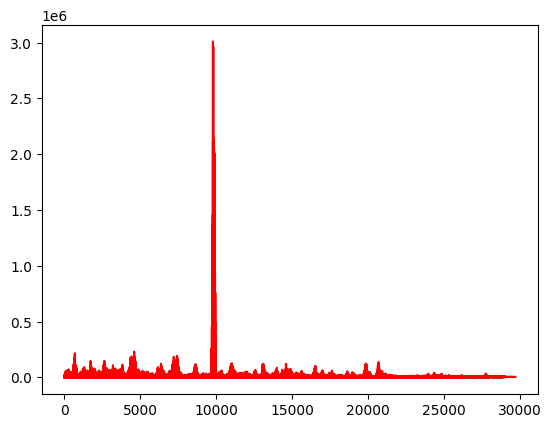

In [124]:
df = dfs["STARFRUIT"]
df["optimal_bid"] = [i if i > 0 else 0 for i in bids]
df["optimal_ask"] = [i if i > 0 else 0 for i in asks]

df["optimal_bid"].plot(color="green")
df["optimal_ask"].plot(color="red")